# Access to Geo-harmonizer datasets

The `eumap` library provides easy access to pan-european spatial datasets produced throughout the Geo-harmonizer project.
The `Catalogue` object connects to our [GeoNetwork](https://data.opendatascience.eu) through CSW and simplifies searching for datasets.

In [1]:
# To work with local eumap code
# import sys
# sys.path.append('../../')

from eumap.datasets import Catalogue

cat = Catalogue()
results = cat.search('land cover')
results

ResourceCollection of 24 total assets:

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
resources:   ['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2019_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2018_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2017_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2016_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2015_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2014_eumap_

It's also possible to exclude results via keywords:

In [2]:
results = cat.search('land cover', exclude=['corine'])
results

ResourceCollection of 20 total assets:

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
resources:   ['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2019_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2018_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2017_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2016_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2015_eumap_epsg3035_v0.1.tif', 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2014_eumap_

and to search by year:

In [3]:
results = cat.search('land cover', exclude=['corine'], years=[2015, 2018])
results

ResourceCollection of 2 total assets:

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
year:        [2015]
resources:   ['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2015_eumap_epsg3035_v0.1.tif']
N_resources: 1

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
year:        [2018]
resources:   ['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2018_eumap_epsg3035_v0.1.tif']
N_resources: 1

Individual resources can be accessed either by indexing the collection directly or by access to the aggregated sets of metadata:

In [4]:
results = cat.search('land cover')
results[0]

title:    Land Cover
abstract: hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:    Land cover, land use and administrative data
url:      https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2019_eumap_epsg3035_v0.1.tif

In [5]:
results.meta[0].resources[0]

title:    Land Cover
abstract: hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:    Land cover, land use and administrative data
url:      https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2019_eumap_epsg3035_v0.1.tif

Resource metadata can be accessed through the `.meta` property:

In [6]:
resource = results[0]
resource.meta.abstract

'hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.'

Asside from carrying metadata, `Resource` objects behave exactly like regular Python strings, so you can use them as you would any other URL:

In [7]:
import rasterio as rio

src = rio.open(resource)
src

<open DatasetReader name='https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2019_eumap_epsg3035_v0.1.tif' mode='r'>

If you would like to use raw CSW manipulation through the [`owslib.csw`](https://geopython.github.io/OWSLib/usage.html#csw) API, this is possible through the `Catalogue.csw` property:

In [8]:
cat.csw

If you prefer not to use `owslib` you can choose to use a fallback API which uses regularly updated plaintext snapshots of the dataset collection instead (`eumap` does this automatically if it is unable to connect to GeoNetwork).

In [9]:
cat = Catalogue(use_csw=False)
cat.search('land cover', exclude=['corine'], years=[2015, 2018])

ResourceCollection of 2 total assets:

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
year:        [2015]
resources:   ['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2015_eumap_epsg3035_v0.1.tif']
N_resources: 1

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
year:        [2018]
resources:   ['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_landcover.hcl_lucas.corine.rf_p_30m_0..0cm_2018_eumap_epsg3035_v0.1.tif']
N_resources: 1

Because all of our layers our stored in a cloud-optimized manner and accessible through S3 buckets, there is no need to download an entire raster.
Let's demonstrate this by accessing the NDVI trend slope layer within the rectagonal boundry of Switzerland (in the ETRS89/LAEA CRS) and plotting the results:

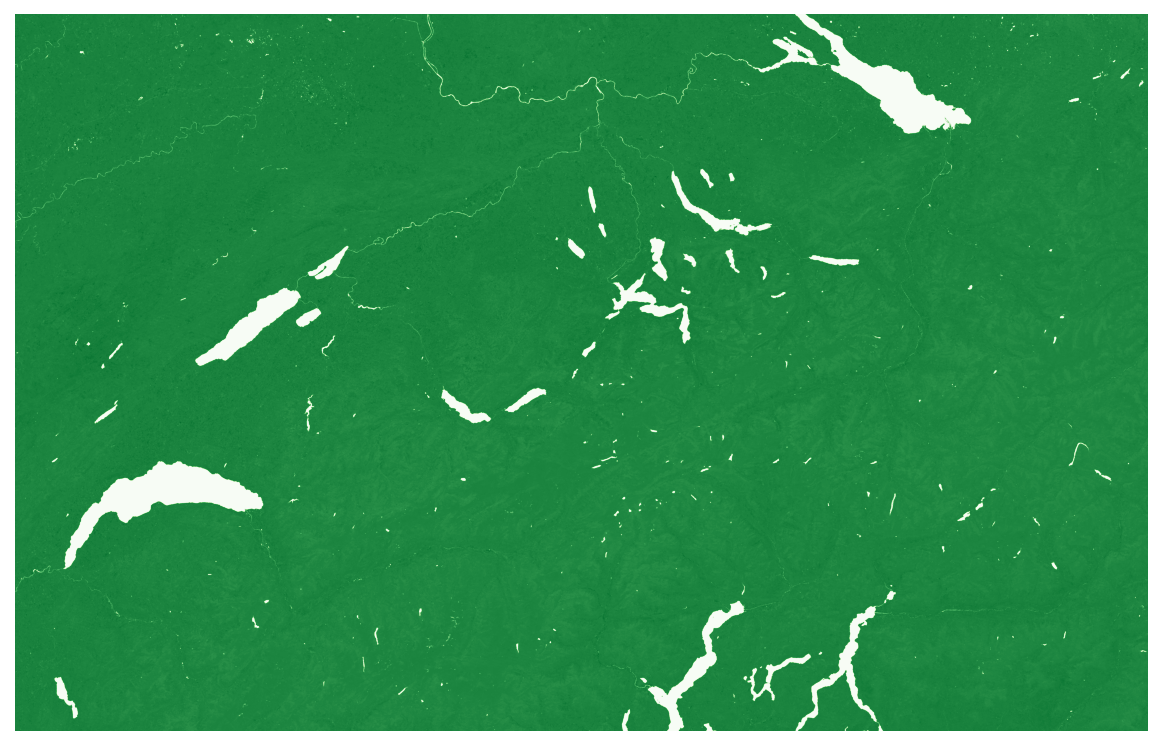

In [10]:
import rasterio as rio
from rasterio import windows

from eumap.datasets import Catalogue
from eumap.plotter import plot_rasters

cat = Catalogue()
results = cat.search('ndvi trend slope', exclude=['r2'])
resource = results[0]

src = rio.open(resource)
bounds = (4008495, 2523628, 4356787, 2744115)
window = windows.from_bounds(*bounds, transform=src.transform)

data = src.read(1, window=window)
plot_rasters(data, cmaps='Greens')

## Accessing OGC OWS

By default cloud-optimized GeoTIFF download links are provided. It's also possible to access OGC OWS _Web Map Service_ (WMS) and _Web Feature Service_ (WFS) links. The desired format is specified by `frmt` argument.

In [11]:
results = cat.search('land cover', exclude=['corine'], frmt=["OGC WMS"])
results

ResourceCollection of 1 total assets:

title:       Land Cover
abstract:    hcl: Land-cover class according to the highest probability, generated by a spatiotemporal ensemble-ML model.
theme:       Land cover, land use and administrative data
layer:       gh:lcv-landcoverXhcl-lucasXcorineXrf-p-30m
resources:   ['https://geoserver-dev.opendatascience.eu/geoserver/wms/']
N_resources: 1

OGC OWS resource can be accessed by owslib. Layer name is provided by `meta.layer` property.

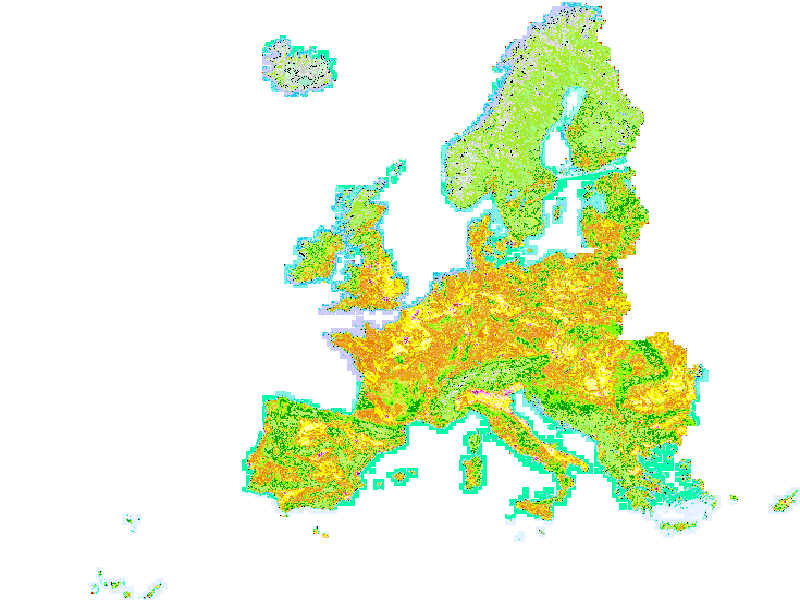

In [12]:
from owslib.wms import WebMapService
wms = WebMapService(results[0])
img = wms.getmap(
     layers=[results[0].meta.layer],
     size=[800, 600],
     srs="EPSG:3035",
     bbox=[900000.0, 930010.0, 6540000.0, 5460010.0],
     format="image/png"
)

from IPython.display import Image
Image(img.read())